# Exploration of Projection Spaces - Utilizing Splines

In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import altair as alt
from altair import datum
alt.data_transformers.disable_max_rows()

from sklearn import manifold
from openTSNE import TSNE
from umap import UMAP

## Preprocessing and Embedding

In [2]:
rubik = pd.read_csv('cube100x2.csv')
rubik.head()

x          y  line             cp       algo up00 up01 up02 up10  \
0 -39.691620  34.030010     0          start   beginner    O    G    R    G   
1 -39.737103  34.053074     0   intermediate   beginner    O    G    R    G   
2 -39.790207  34.080320     0   intermediate   beginner    O    G    Y    G   
3 -39.604057  34.014538     0   intermediate   beginner    G    G    O    R   
4 -39.511086  33.969320     0   intermediate   beginner    G    G    R    R   

  up11  ... down22 back00 back01 back02 back10 back11 back12 back20 back21  \
0    W  ...      Y      R      Y      G      O      B      O      G      W   
1    W  ...      Y      R      Y      G      O      B      O      G      W   
2    W  ...      W      R      Y      R      O      B      R      G      W   
3    W  ...      W      R      Y      R      O      B      R      Y      R   
4    W  ...      Y      R      Y      G      O      B      O      Y      R   

  back22  
0      W  
1      W  
2      B  
3      W  
4      W  

[5 rows x 59 columns]

In [3]:
# select features for projection:
# We just need to remove the meta data columns (line, cp, algo) and pre-computed x and y coordinates, and project the cube states:
meta_data = rubik.iloc[:, :5]
proj_data = rubik.iloc[:, 5:]

proj_data.head()

up00 up01 up02 up10 up11 up12 up20 up21 up22 front00  ... down22 back00  \
0    O    G    R    G    W    R    W    R    Y       O  ...      Y      R   
1    O    G    R    G    W    R    G    R    B       R  ...      Y      R   
2    O    G    Y    G    W    Y    G    R    B       R  ...      W      R   
3    G    G    O    R    W    G    B    Y    Y       Y  ...      W      R   
4    G    G    R    R    W    R    B    Y    W       Y  ...      Y      R   

  back01 back02 back10 back11 back12 back20 back21 back22  
0      Y      G      O      B      O      G      W      W  
1      Y      G      O      B      O      G      W      W  
2      Y      R      O      B      R      G      W      B  
3      Y      R      O      B      R      Y      R      W  
4      Y      G      O      B      O      Y      R      W  

[5 rows x 54 columns]

In [4]:
# one hot encode the colors (White, Green, Red, Orange, Yellow, Blue)
one_hot_rubiks = pd.get_dummies(proj_data)
one_hot_rubiks.head()

up00_B  up00_G  up00_O  up00_R  up00_W  up00_Y  up01_B  up01_G  up01_O  \
0       0       0       1       0       0       0       0       1       0   
1       0       0       1       0       0       0       0       1       0   
2       0       0       1       0       0       0       0       1       0   
3       0       1       0       0       0       0       0       1       0   
4       0       1       0       0       0       0       0       1       0   

   up01_R  ...  back21_O  back21_R  back21_W  back21_Y  back22_B  back22_G  \
0       0  ...         0         0         1         0         0         0   
1       0  ...         0         0         1         0         0         0   
2       0  ...         0         0         1         0         1         0   
3       0  ...         0         1         0         0         0         0   
4       0  ...         0         1         0         0         0         0   

   back22_O  back22_R  back22_W  back22_Y  
0         0         0         1         0  
1         0         0         1         0  
2         0         0         0         0  
3         0         0         1         0  
4         0         0         1         0  

[5 rows x 294 columns]

In [5]:
import math
tsne_coords = manifold.TSNE(perplexity=15).fit_transform(one_hot_rubiks)
tsne_coords.shape

(21414, 2)

In [6]:
# turn coords into pandas dataframe
df_tsne_coords = pd.DataFrame(tsne_coords, columns=['X','Y'])
df_tsne_coords.describe()

X             Y
count  21414.000000  21414.000000
mean      -0.410673     -0.048772
std       45.834896     46.367901
min     -104.133896   -100.463776
25%      -34.427966    -35.724704
50%        1.851187     -0.364596
75%       33.437635     36.505887
max      101.042427    104.312286

In [7]:
# Add meta data for addtional encodings
tsne_rubiks = pd.concat([meta_data, df_tsne_coords], axis='columns')
tsne_rubiks

x          y  line             cp       algo          X  \
0     -39.691620  34.030010     0          start   beginner -31.383673   
1     -39.737103  34.053074     0   intermediate   beginner -31.248903   
2     -39.790207  34.080320     0   intermediate   beginner -31.108164   
3     -39.604057  34.014538     0   intermediate   beginner -32.083076   
4     -39.511086  33.969320     0   intermediate   beginner -32.128799   
...          ...        ...   ...            ...        ...        ...   
21409 -57.208717  -3.874739   199   intermediate   fridrich -51.846199   
21410 -29.877201 -51.856610   199   intermediate   fridrich  -0.836878   
21411 -15.721056 -47.772835   199   intermediate   fridrich -23.209351   
21412  32.993095 -25.695858   199   intermediate   fridrich   7.419448   
21413  34.068900 -21.173780   199            end   fridrich  43.790321   

               Y  
0      42.310627  
1      41.883633  
2      41.459618  
3      41.478901  
4      41.844158  
...          ...  
21409  44.806782  
21410  71.282646  
21411  72.337570  
21412 -92.182388  
21413 -84.610847  

[21414 rows x 7 columns]

## Plotting Without Splines

In [8]:
alt.Chart(tsne_rubiks).mark_line(
    opacity=0.3
).encode(
    x='X',
    y='Y',
    detail='line:N', # draw one line per attempt, but ...
    color='algo:N', # .. color the lines per solving strategy
    order='index:Q'
).properties(
    width=700,
    height=700,
    title="Solving attempts by strategy"
).interactive() + alt.Chart(tsne_rubiks).transform_filter(
    (datum.cp == ' end') | (datum.cp == ' start') # no intermediate states
).mark_point().encode(
    x='X',
    y='Y',
    shape='cp:N',
    color='algo:N', # .. color the lines per solving strategy
).properties(
    width=700,
    height=700
).interactive()

alt.LayerChart(...)

In [9]:
alt.Chart(tsne_rubiks).mark_line(
    opacity=0.3
).encode(
    x='X',
    y='Y',
    detail='line:N', # draw one line per attempt, but ...
    color='algo:N', # .. color the lines per solving strategy
    order='index:Q',
    column='algo:N'
).properties(
    title="Solving attempts by strategy"
).interactive()

alt.Chart(...)

## Plotting With Splines in Matplotlib
Splines in data visualization create smooth curves, enhancing the readability of plots by reducing visual noise and highlighting underlying trends. Unlike direct connections between points, which can look jagged and cluttered, splines offer a cleaner view, making it easier to identify patterns or trajectories in the data. By mitigating the impact of outliers and minor fluctuations, splines allow for a more intuitive and focused interpretation of the main aspects of the dataset, improving overall clarity and comprehension.

For your project please also consider utilizing splines. We also recommend looking into Catmull–Rom splines - code : https://en.wikipedia.org/wiki/Centripetal_Catmull%E2%80%93Rom_spline

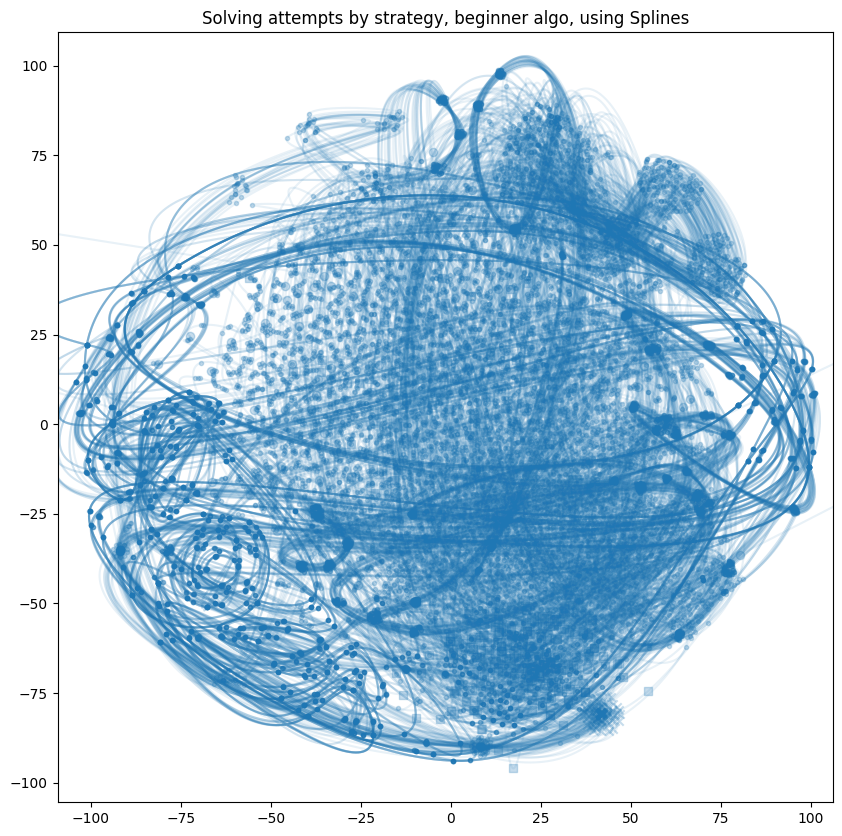

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import interpolate

tsne_rubiks_algo1 = tsne_rubiks[tsne_rubiks['algo'] == ' beginner']

# Function to plot splines
def plot_df_splines(ax, df, color, alpha=0.3, smoothing=0, n_points=300):
    x = df['X'].values
    y = df['Y'].values
    
    if len(x) > 3:  # At least 4 points are required to make a cubic spline
        # smoothing=0 means pass directly through all points. higher smoothing may not pass through all points
        # tck: A tuple containing the vector of knots, the coefficients, and the degree of the spline. This is essentially the representation of the spline.
        # u: An array of values parameterizing the curve. It’s like a normalized scale along the curve.
        tck, u = interpolate.splprep([x, y], s=smoothing) # prepare the B-spline representation of an N-D curve
        # der=0 means that we want the value of the spline at these points, not its derivatives.
        x_new, y_new = interpolate.splev(np.linspace(0, 1, n_points), tck, der=0) # evaluate the values of the spline function at specific points
        ax.plot(x_new, y_new, color=color, alpha=alpha)


# Define colors for each unique algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Get unique algorithms
algorithms = tsne_rubiks_algo1['algo'].unique()

# Loop through each unique algorithm
for i, algo in enumerate(algorithms):
    algo_data = tsne_rubiks_algo1[tsne_rubiks_algo1['algo'] == algo]
    lines = algo_data['line'].unique()
    
    for line in lines:
        line_data = algo_data[algo_data['line'] == line]
        plot_df_splines(ax, line_data, colors[i], alpha=0.1, smoothing=0, n_points=9999)

# Mark start and end points
for i, algo in enumerate(algorithms):
    start_data = tsne_rubiks_algo1[(tsne_rubiks_algo1['cp'] == ' start') & (tsne_rubiks_algo1['algo'] == algo)]
    checkpoint_data = tsne_rubiks_algo1[(tsne_rubiks_algo1['cp'] == ' checkpoint') & (tsne_rubiks_algo1['algo'] == algo)]
    intermediate_data = tsne_rubiks_algo1[(tsne_rubiks_algo1['cp'] == ' intermediate') & (tsne_rubiks_algo1['algo'] == algo)]
    end_data = tsne_rubiks_algo1[(tsne_rubiks_algo1['cp'] == ' end') & (tsne_rubiks_algo1['algo'] == algo)]
    
    ax.scatter(start_data['X'], start_data['Y'], color=colors[i], marker='o', alpha=0.25)
    ax.scatter(checkpoint_data['X'], checkpoint_data['Y'], color=colors[i], marker='s', alpha=0.25)
    ax.scatter(intermediate_data['X'], intermediate_data['Y'], color=colors[i], marker='.', alpha=0.25)
    ax.scatter(end_data['X'], end_data['Y'], color=colors[i], marker='x', alpha=0.25)

ax.set_title("Solving attempts by strategy, beginner algo, using Splines")
margin = 5
plt.xlim(df_tsne_coords['X'].min() - margin, df_tsne_coords['X'].max() + margin)
plt.ylim(df_tsne_coords['Y'].min() - margin, df_tsne_coords['Y'].max() + margin)
plt.show()